# Imports

In [3]:
import gym
import gym_2048
import numpy as np
from tensorforce import Environment, Agent
import matplotlib.pyplot as plt

# First model

In [13]:
environment = Environment.create(
    environment='gym', level='2048-v0', max_episode_timesteps=500
)

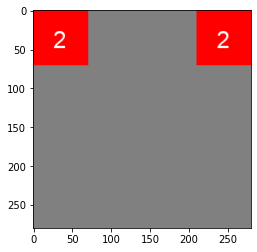

In [14]:
plt.imshow(environment._environment.environment.render(mode="rgb_array"));

In [15]:
# Instantiate a Tensorforce agent
agent = Agent.create(
    agent='dqn',
    batch_size= 16,
    environment=environment,  # alternatively: state, action, (max_episode_timesteps)
    memory=100000,
    exploration=0.2,
    target_sync_frequency=10,
    learning_rate=0.0001,
    summarizer=dict(directory='summaries')
)

# Train for 300 episodes
for _ in range(100):

    # Initialize episode
    state = environment.reset()
    terminal = False
    total_reward = 0
    
    while not terminal:
        # Episode timestep
        action = agent.act(states=state)
        state, terminal, reward = environment.execute(actions=action)
        agent.observe(terminal=terminal, reward=reward)
        total_reward =+ reward
    print(_, total_reward)

#agent.close()
environment.close()

0 0.0
1 4.0
2 4.0
3 4.0
4 4.0


KeyboardInterrupt: 